<a href="https://colab.research.google.com/github/bee0311/bee0311/blob/main/3D_%ED%94%84%EB%A6%B0%ED%8A%B8_%EC%B6%9C%EB%A0%A5%EB%AC%BC_%EB%B6%84%EB%A5%98%EA%B8%B0_%EA%B5%AC%EC%B6%95%ED%95%98%EA%B8%B0_202015121%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#파일 다운받기
!pip install gdown

In [2]:
import os
import zipfile

import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [3]:
import gdown
url = 'https://drive.google.com/drive/folders/1ZnYP0NyOMo55z4IW6uM3c2U8YA_U-4Sj?usp=sharing'
gdown.download_folder(url, quiet=True)

['/content/dataset/dataset.zip']

In [4]:
local_zip = '/content/dataset/dataset.zip' 
zip_ref = zipfile.ZipFile(local_zip, 'r') 
zip_ref.extractall('/content/')
zip_ref.close()

In [5]:

validation_ratio = 1/8
train_batch_size = 24
test_batch_size = 8
TRAINING_DIR = "/content/dataset/Train" 
datagen = ImageDataGenerator(validation_split=validation_ratio,
                             rescale = 1./255)

train_generator = datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(256,256),  
    class_mode='categorical', 
    batch_size=train_batch_size,
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(256,256),  
    class_mode='categorical', 
    batch_size=train_batch_size, 
    subset='validation'
)

TEST_DIR = "/content/dataset/Test"
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=test_batch_size
)


Found 203 images belonging to 2 classes.
Found 28 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [6]:
#총 네번 반복
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (256, 256, 3)), 
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    #Dropout     
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.5),
                                    #512 neuron hidden layer > 512개의 은닉층
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(2, activation = 'softmax') #2개의 뉴럴                                                                                                                                                           
])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

#학습 시작
history = model.fit(train_generator, epochs = 20, #20으로 변경
                              steps_per_epoch = train_generator.samples//train_batch_size, #자꾸 오류나서 수식으로 바꿔줌
                              validation_data = validation_generator,
                              validation_steps = 3,
                              verbose = 1)


Epoch 1/20
8/8 [==============================] - 63s 7s/step - loss: 2.2357 - accuracy: 0.6313 - val_loss: 0.5200 - val_accuracy: 0.8214
Epoch 2/20
8/8 [==============================] - 39s 5s/step - loss: 0.4941 - accuracy: 0.7877
Epoch 3/20
8/8 [==============================] - 42s 5s/step - loss: 0.4423 - accuracy: 0.8073
Epoch 4/20
8/8 [==============================] - 38s 5s/step - loss: 0.5236 - accuracy: 0.8324
Epoch 5/20
8/8 [==============================] - 38s 5s/step - loss: 0.2777 - accuracy: 0.9106
Epoch 6/20
8/8 [==============================] - 41s 5s/step - loss: 0.3484 - accuracy: 0.9375
Epoch 7/20
8/8 [==============================] - 38s 5s/step - loss: 0.1414 - accuracy: 0.9385
Epoch 8/20
8/8 [==============================] - 38s 5s/step - loss: 0.0925 - accuracy: 0.9665
Epoch 9/20
8/8 [==============================] - 38s 5s/step - loss: 0.1047 - accuracy: 0.9888
Epoch 10/20
8/8 [==============================] - 38s 5s/step - loss: 0.3570 - accuracy: 0.96

ValueError: ignored

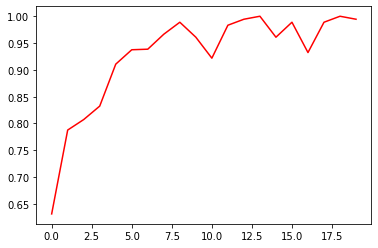

In [7]:
#시각화 함수
import matplotlib.pyplot as plt 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.legend(loc='best')
plt.title('Training and validation accuracy') 


plt.figure(2)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.legend(loc='best')
plt.title('Training and validation loss') 



plt.show()

In [8]:
# 훈련된 모델을 test_generator로 평가
print("-- Evaluate(정확도) --") 
scores = model.evaluate_generator(test_generator, steps=5) 
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate(정확도) --


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


accuracy: 95.00%


Saving 테스트 사진.jpg to 테스트 사진.jpg
[[1. 0.]]


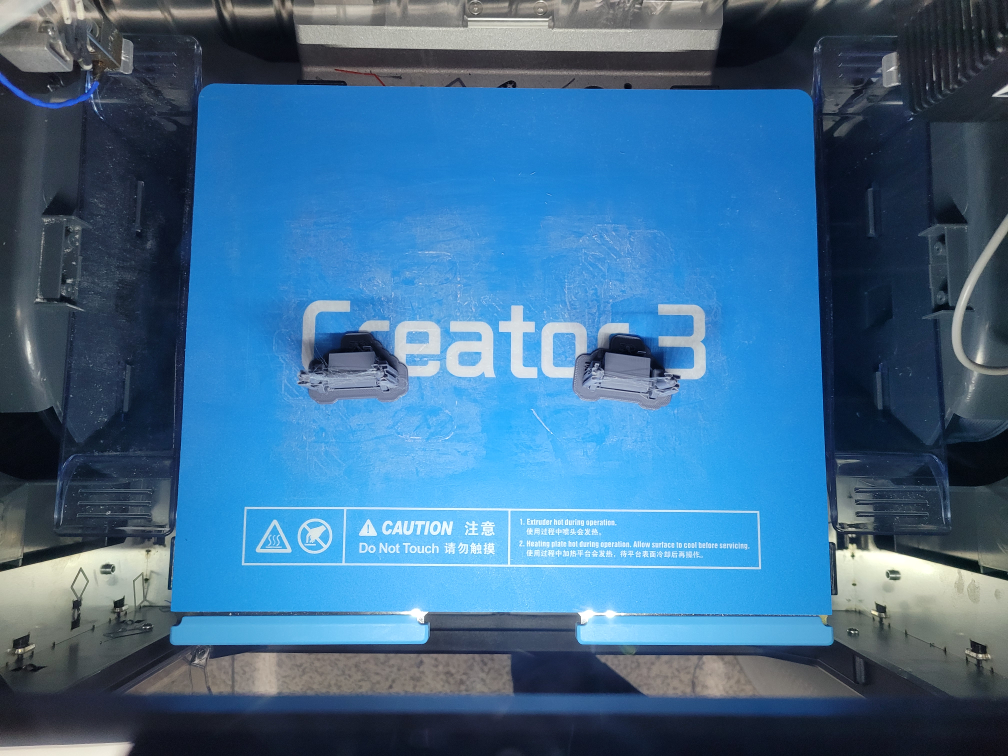

3D 프린터를 사용하기 전 실습조교에게 문의 바랍니다


In [9]:
# 이미지 입력하여 결과 확인해보기

import numpy as np
from google.colab import files
from keras.preprocessing import image
from google.colab.patches import cv2_imshow
import cv2

uploaded = files.upload()

for fn in uploaded.keys():
 
  # 이미지 예측하기
  path = fn
  img = image.load_img(path, target_size=(256, 256))
  image_1 = cv2.imread(fn, cv2.IMREAD_REDUCED_COLOR_4)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes)
  if classes[0,0] >= 0.9:
    cv2_imshow(image_1)
    print("3D 프린터를 사용하기 전 실습조교에게 문의 바랍니다")
  else:
    cv2_imshow(image_1)
    print("3D 프린터를 사용하셔도 됩니다")
